# Data Science Mathematics
# Simple Linear Regression
# In-Class Activity

Refer to your class handout for background information.

In [1]:
import numpy as np
from scipy import stats

#### Question 1:  

You have collected data on Chinese activity in the South China Sea that you believe are correlated.  You suspect that the presence of Chinese submarines within the region is related to an increase in observed cyber activity.

 | Submarine Sightings | Cyber Activity Metric |
 |:-:|:-:|
 |1 | 0.021025 |
 |2 | 0.022103 |
 |3 | 0.023237 |
 |4 | 0.024428 |
 |5 | 0.025681 |
 |6 | 0.026997 |
 |7 | 0.028381 |
 |8 | 0.029836 |
 |9 | 0.031366 |
 |10 | 0.032974 |
 
Let's instantiate the data set.

In [2]:
submarine_sightings = np.array([1,2,3,4,5,6,7,8,9,10])
cyber_activity_metric = np.array([0.021025,0.022103,0.023237,0.024428,0.025681,0.026997,0.028381,0.029836,0.031366,0.032974])

Now, let's calculate our regression values.

In [3]:
slope, intercept, r_value, p_value, std_err = stats.linregress(submarine_sightings,cyber_activity_metric)

In [4]:
slope, intercept, r_value, p_value, std_err

(0.001324557575757576,
 0.019317733333333337,
 0.9980126947882119,
 6.807697897873586e-11,
 2.9567948236252566e-05)

Next, print the R^2 value.  How good is your fit?

In [5]:
print('r-squared:', r_value**2)

r-squared: 0.9960293389584285


Text(0, 0.5, 'cyber activity metric (%)')

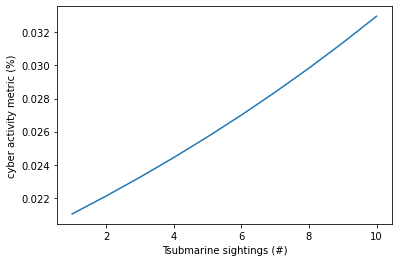

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(submarine_sightings, cyber_activity_metric)
plt.xlabel('Tsubmarine sightings (#)')
plt.ylabel('cyber activity metric (%)')

The relationship between $'submarine \ sightings'$ and $'cyber \ activity \ metric'$ looks very linear.  We may be able to take natural logarithm of each $'cyber \ activity \ metric'$ value to transform the slightly curve into a straight line.  We can experiment this natural logarithm transformation at the end of this in-class activity.

### Question 1:  Solve Linear Regression Problem

**1.a** Calculate the sample correlation coefficient.
 
#### Answer for Question 1.a

In [7]:
##Calculate the correlation coeffeicient in one line using numpy 
cocoeff = np.corrcoef(submarine_sightings,cyber_activity_metric)
print("1.a Sample Correlation Coeffeicient = ", round(cocoeff[0,1],3))

1.a Sample Correlation Coeffeicient =  0.998


**1.b** Calculate the parameters $\alpha = 0.019315$ and $\beta = 0.001325$.

In [8]:
# Answer for Question 1.b
# y = mx+ b
x_bar = np.mean(submarine_sightings)
y_bar = np.mean(cyber_activity_metric)
S_y = np.std(cyber_activity_metric, ddof=1)
x_var = np.var(submarine_sightings, ddof=1)

sigma_xy = 0
for i in range(len(submarine_sightings)): 
    sigma_xy += ((submarine_sightings[i] - x_bar)*(cyber_activity_metric[i] - y_bar))

cov_eqn = sigma_xy/(len(submarine_sightings)-1)

#covarainnce the short way
# Build a list so numpy can process, xandy
xandy = [submarine_sightings,cyber_activity_metric]
cov_numpy = np.cov(xandy)
#print(cov_numpy[0][1], cov_eqn)
print("cov_eqn = ", round(cov_eqn,6) , " === ", "cov_numpy[0][1] = ", round(cov_numpy[0][1],6))

beta_hat = round(cov_eqn/x_var,6)
# alpha_hat = y_bar - beta_hat * x_bar
alpha_hat = round(y_bar - beta_hat * x_bar,6)

print("alpha_hat = ", alpha_hat, "     ", "beta_hat = ", beta_hat)

cov_eqn =  0.012142  ===  cov_numpy[0][1] =  0.012142
alpha_hat =  0.019315       beta_hat =  0.001325


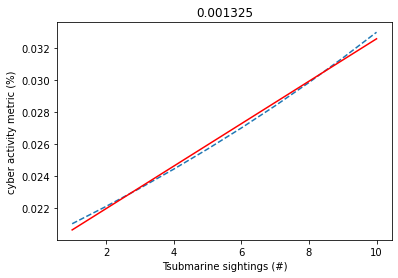

In [9]:
# Create a list of values in the best fit line
abline_values = [alpha_hat + beta_hat * i for i in submarine_sightings]

# Plot the best fit line over the actual values
plt.plot(submarine_sightings, cyber_activity_metric, '--')
plt.xlabel('Tsubmarine sightings (#)')
plt.ylabel('cyber activity metric (%)')
plt.plot(submarine_sightings, abline_values, 'r')
plt.title(beta_hat)
plt.show()

**1.c** Does a linear relationship exist between these data sets?  How do you know?

#### Answer for Question 1.c

Yes, there exists a linear relationship in the ranges between these twenty data points, because their sample correlation coeffeicient is 0.998, incdicating their relationship is almost at the level of perfect linear, as displayed with the red solid line.

**1.d** Based on your calculations, is there a correlative relationship between cyber activity and submarines within the region?

#### Answer for Question 1.d

The calculations seem to suggest that there exists a correlative relationship between $cyber\ activity$ and $number\ of\ submarines$ within the region, but this $correlation$ might be in effect via the third variable, a confoundering variable, causing a spurious linearly association between these two data sets. For example, there might exist strong linear correlationshp between the sale volume of ice scream and the number of deaths due to drowning in the summer time.  The confounding variable might be the high temperature in the summer as people tend to buy and eat ice scream more and go to beach or swimming pools during the hot summer times. Therefore, whenever possible, more data or evidence from different and independent perspectives or dimensions will be needed to examine and understand such associations.

### Question 2 Solve the Gradient Descent Problem

You are developing a convolutional neural network for identifying Chinese military images on social media.  Your loss function and gradient functions are:

$$ f(m, b) = m^2 + b^2 $$

$$ \nabla f(m,b) = [2m, 2b] $$

Let $a_n$ represent a given $(m,b)$ coordinate pair. The gradient descent formula is defined as:

$$ a_{n+1} = a_n - \gamma \nabla f(a_n) $$

Answer the following questions:

a.Using a learning rate of 0.1, calculate the first 5 gradient descent iterations, beginning at (1,5). Did your model converge?

b.Increase the learning rate to 0.5, and repeat step a. Does your model converge?

c.Explain the significance of the learning rate. Did it have an impact on the convergence of your model?

In [10]:
def solve_gradient_problem(step_size, iteration):
    tests_list = []
    #step = 0.1
    #step_list = [0.1, 0.2, 0.3, 0.4, 0.5]
    #for step_size in step_list:
    pos = [1,5,1**2+5**2] #f(m,b) = m**2 + b**2)
    iters_list = [] #"Step 0",[pos[0],pos[1],pos[2]]]
    iters_list.append(["Step 0",[pos[0],pos[1],pos[2]]])
    tests = {}
    for i in range(iteration):
        pos[0] = round((pos[0] - (step_size * 2 * pos[0])),6)
        pos[1] = round((pos[1] - (step_size * 2 * pos[1])),6)
        pos[2] = round((pos[0]**2 + pos[1]**2),6)

        iters_list.append(["Step "+str(i+1),[pos[0],pos[1],pos[2]]])
        #print("Step {}".format(i))
        #print (pos)
        #print ("\n")
    tests = {'step_size': step_size, 'test': iters_list}
    tests_list.append(tests)
    return tests_list[0]['test'] # Has the results for the Learning rate of 0.1

In [11]:
print('step size = 0.1')
solve_gradient_problem(0.1,10)

step size = 0.1


[['Step 0', [1, 5, 26]],
 ['Step 1', [0.8, 4.0, 16.64]],
 ['Step 2', [0.64, 3.2, 10.6496]],
 ['Step 3', [0.512, 2.56, 6.815744]],
 ['Step 4', [0.4096, 2.048, 4.362076]],
 ['Step 5', [0.32768, 1.6384, 2.791729]],
 ['Step 6', [0.262144, 1.31072, 1.786706]],
 ['Step 7', [0.209715, 1.048576, 1.143492]],
 ['Step 8', [0.167772, 0.838861, 0.731835]],
 ['Step 9', [0.134218, 0.671089, 0.468375]],
 ['Step 10', [0.107374, 0.536871, 0.29976]]]

**Answer 1.a** Yes, using a learning rate of 0.1, the value of the loss function seems decreasing montonically, starting with 26 and ending with 2.791729 at Step 5. However, it will take more than 30 steps to get to the anticipated optimal solutions of (0,0) for the loss function of 0.

In [12]:
print('step size = 0.5')
solve_gradient_problem(0.5,10)

step size = 0.5


[['Step 0', [1, 5, 26]],
 ['Step 1', [0.0, 0.0, 0.0]],
 ['Step 2', [0.0, 0.0, 0.0]],
 ['Step 3', [0.0, 0.0, 0.0]],
 ['Step 4', [0.0, 0.0, 0.0]],
 ['Step 5', [0.0, 0.0, 0.0]],
 ['Step 6', [0.0, 0.0, 0.0]],
 ['Step 7', [0.0, 0.0, 0.0]],
 ['Step 8', [0.0, 0.0, 0.0]],
 ['Step 9', [0.0, 0.0, 0.0]],
 ['Step 10', [0.0, 0.0, 0.0]]]

**Answer 1.b** Yes, using a learning rate of 0.5, it takes only one step to get the value of the loss function to the anticipated optimal solutions of (0,0) for the loss function of 0.  With a learning rate of 0.95, the value of the loss function seems oscillating but its absolute values seem decreasing montonically, starting with 26 and ending with -0.59049 at Step 5. However, it will take more than 70 steps to get to the anticipated optimal solutions of (0,0) for the loss function of 0. 

In [13]:
print('step size = 0.95')
solve_gradient_problem(0.95,10)

step size = 0.95


[['Step 0', [1, 5, 26]],
 ['Step 1', [-0.9, -4.5, 21.06]],
 ['Step 2', [0.81, 4.05, 17.0586]],
 ['Step 3', [-0.729, -3.645, 13.817466]],
 ['Step 4', [0.6561, 3.2805, 11.192147]],
 ['Step 5', [-0.59049, -2.95245, 9.065639]],
 ['Step 6', [0.531441, 2.657205, 7.343168]],
 ['Step 7', [-0.478297, -2.391484, 5.947964]],
 ['Step 8', [0.430467, 2.152336, 4.817852]],
 ['Step 9', [-0.38742, -1.937102, 3.902458]],
 ['Step 10', [0.348678, 1.743392, 3.160992]]]

**Answer 1.c** The size of the learning rate did have an impact on the convergence of the model.  In general, the larger the learning rate, the faster the model will converge.  But when the learning rate is too large, the gain for the convergence diminishes, and may come with the risk of overshooting the optimal parameters that minimize the loss function.

### Test Problem 3: Linearize an exponential function

In [14]:
# Linearize y
ln_y = []
for cam in cyber_activity_metric: 
    ln_y.append(np.log(cam))
ln_y

[-3.8620430731231252,
 -3.812041933064832,
 -3.7620094431106614,
 -3.712025263621249,
 -3.6620038601085816,
 -3.612029530262216,
 -3.562035371789269,
 -3.51203956088922,
 -3.462030775269904,
 -3.4120359068431503]

Text(0, 0.5, 'ln(cyber activity metric)')

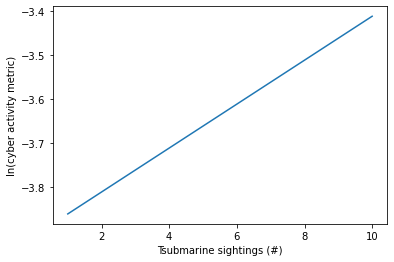

In [15]:
plt.plot(submarine_sightings,ln_y)
plt.xlabel('Tsubmarine sightings (#)')
plt.ylabel('ln(cyber activity metric)')

In [16]:
cocoeff_ln_y = np.corrcoef(submarine_sightings,ln_y)
print("1.a Sample Correlation Coeffeicient = ", round(cocoeff_ln_y[0,1],4))

1.a Sample Correlation Coeffeicient =  1.0


After taking natural logarithm transformation over the values of cyber activity metric, the slightly curve is transformed into a perfect straight line between $submarine\ sightings$ and logarithmed $cyber\ activity\ metric$.

In [17]:
x_bar = np.mean(submarine_sightings)
y_bar = np.mean(ln_y)
S_y = np.std(ln_y, ddof=1)
x_var = np.var(submarine_sightings, ddof=1)
sigma_xy = 0
for i in range(len(submarine_sightings)): 
    sigma_xy += ((submarine_sightings[i] - x_bar)*(ln_y[i] - y_bar))

cov = sigma_xy/(len(submarine_sightings)-1)
#covarainnce the short way
xandy = [submarine_sightings,ln_y]
# print("Format list so numpy can process", xandy)
cov2 = np.cov(xandy)
beta_hat = round(cov/x_var,6)
# alpha_hat = y_bar - beta_hat * x_bar
alpha_hat = round(y_bar - beta_hat * x_bar,6)

#de linearize: 
coeff_lny = round(np.exp(alpha_hat),4)
coeff_lny
print("alpha_hat = ", alpha_hat, "     ", "beta_hat = ", beta_hat, "     ", "coeff = ", coeff_lny)

alpha_hat =  -3.912029       beta_hat =  0.05       coeff =  0.02


In [18]:
import math
xy_given = []
xy_new = []
for i in range(10):
    xy_new.append([i+1,round(coeff_lny*math.exp(beta_hat*(i+1)),6)])
    xy_given.append([submarine_sightings[i], cyber_activity_metric[i]] )
    print("xy_new[{}]".format(i),xy_new[i],"  ","xy_given[{}]".format(i),xy_given[i])

#print(xy_new)
#print(xy_given)

xy_new[0] [1, 0.021025]    xy_given[0] [1, 0.021025]
xy_new[1] [2, 0.022103]    xy_given[1] [2, 0.022103]
xy_new[2] [3, 0.023237]    xy_given[2] [3, 0.023237]
xy_new[3] [4, 0.024428]    xy_given[3] [4, 0.024428]
xy_new[4] [5, 0.025681]    xy_given[4] [5, 0.025681]
xy_new[5] [6, 0.026997]    xy_given[5] [6, 0.026997]
xy_new[6] [7, 0.028381]    xy_given[6] [7, 0.028381]
xy_new[7] [8, 0.029836]    xy_given[7] [8, 0.029836]
xy_new[8] [9, 0.031366]    xy_given[8] [9, 0.031366]
xy_new[9] [10, 0.032974]    xy_given[9] [10, 0.032974]


***Now save your output.  Go to File -> Print Preview and save your final output as a PDF.  Turn in to your Instructor, along with any additional sheets.